# Auto

Load dependent libraries

In [140]:
library(dplyr)
library(reshape)
library(ggplot2)

Load Auto dataset from `Auto.csv` file into `df` dataframe

In [141]:
df <- read.csv("Auto.csv", header = TRUE)
attach(df)

The following objects are masked from df (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from df (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following object is masked from package:ggplot2:

    mpg



## Exploratory data analysis

### Dataset info

In [142]:
str(df)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 301 levels "amc ambassador brougham",..: 49 36 230 14 160 141 54 222 240 2 ...


The `Auto` dataset contains *392 observations* of *9 variables*. 
- `mpg` is the label variable we intend to predict
- 8 feature variables are available
    - **6 quantitative features** including number of `cylinders`, `displacement`, `horsepower`...
    - **2 qualitative feature** describing the Automobile `name` and `origin`

In [143]:
# removing factors from name column
df$name <- as.character(df$name)

In [144]:
summary(df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year           origin          name          
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:392        
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.54   Mean   :75.98   Mean   :1.577                     
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000                     
 Max.   :24.80   Max.   :82.00  

### Check for missing values and typos

In [145]:
# check for NA values in the dataframe
any(is.na(df))

[1] FALSE

In [146]:
head(df)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [147]:
tail(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,27,4,151,90,2950,17.3,82,1,chevrolet camaro
388,27,4,140,86,2790,15.6,82,1,ford mustang gl
389,44,4,97,52,2130,24.6,82,2,vw pickup
390,32,4,135,84,2295,11.6,82,1,dodge rampage
391,28,4,120,79,2625,18.6,82,1,ford ranger
392,31,4,119,82,2720,19.4,82,1,chevy s-10


Exploring the sturcture of the dataset and the data suggets that there's no inconsistent values in the dataset

### Check for outliers in the dataset

In [148]:
melt.df <- melt(df[,1:length(df)-1])
head(melt.df,3)

Using  as id variables


variable,value
mpg,18
mpg,15
mpg,18


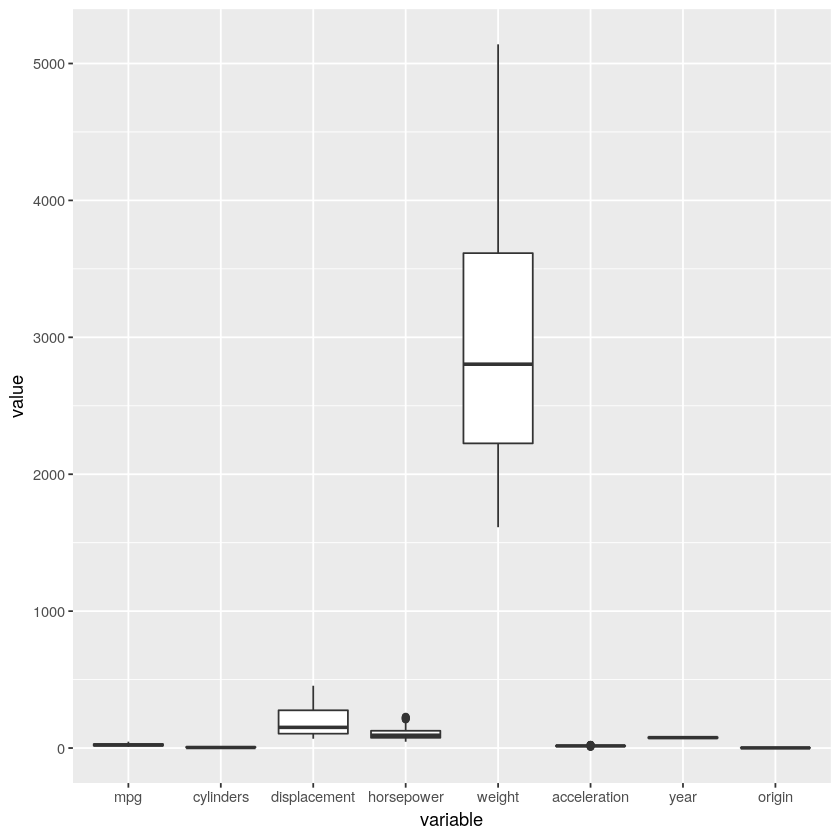

In [149]:
p <- ggplot(melt.df, aes(variable, value)) 
p + geom_boxplot() 

We can observe the following from the above boxplot
* `weight` variable is out of scale, compared to other variables
* `horsepower` and `acceleration` contains outliers

In [150]:
# applying transformation on weight variable
df$weight <- log(df$weight)

Using  as id variables


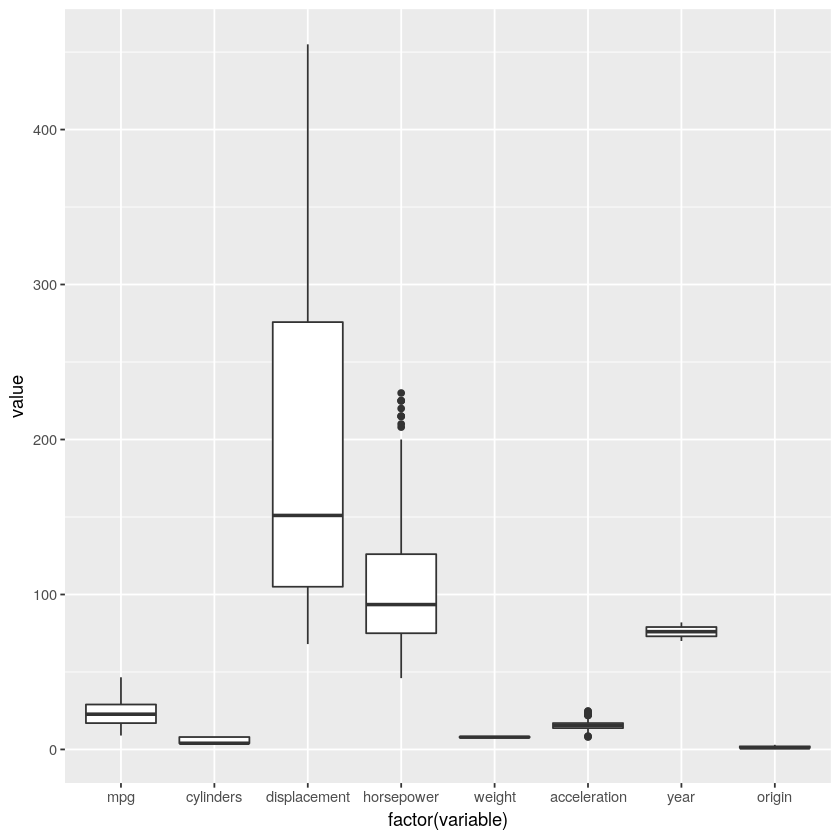

In [151]:
# melt dataframe
melt.df2 <- melt(df[,1:length(df)-1])

# boxplot on the new data with log(weight)
p <- ggplot(melt.df2, aes(factor(variable), value)) 
p + geom_boxplot() 

Applying transformations on `displacement` and `horsepower` and `year` variable

In [152]:
df$displacement <- sqrt(displacement)
df$horsepower <- sqrt(horsepower)
df$year <- sqrt(year)
# df$mpg <- log(mpg)

Using  as id variables


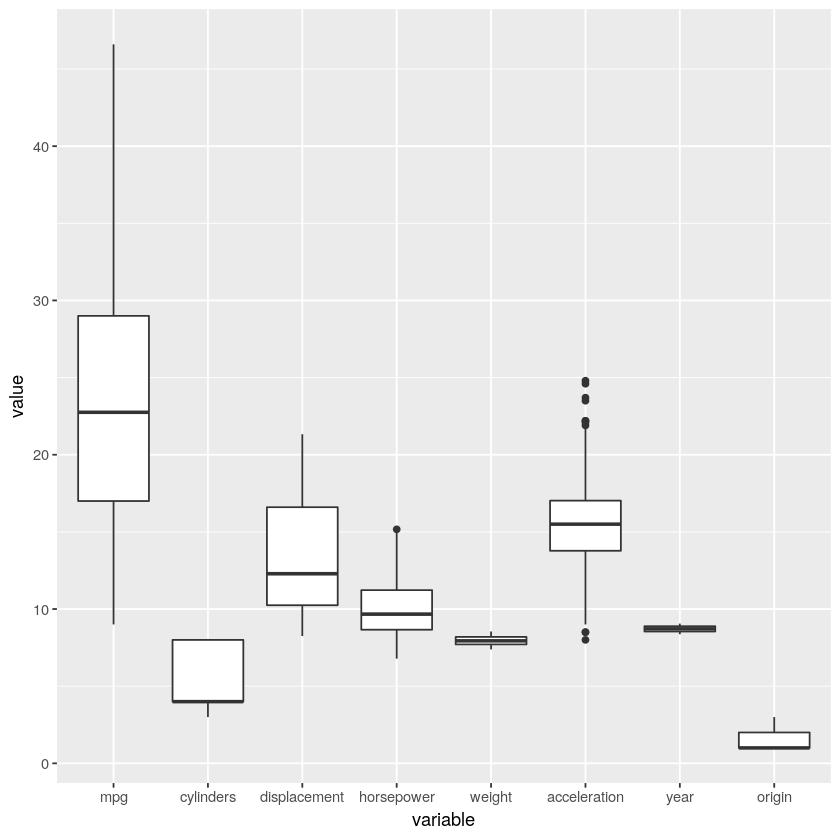

In [153]:
# melt dataframe
melt.df3 <- melt(df[,1:length(df)-1])

# boxplot on the new data with log(weight)
p <- ggplot(melt.df3, aes(variable, value)) 
p + geom_boxplot() 

For convenience we remove all the outliers from `horsepower` and `acceleration`

In [154]:
box.acc <- boxplot(acceleration, plot=FALSE)
box.horse <- boxplot(horsepower, plot=FALSE)

In [155]:
df.clean <- subset(df, !(df$acceleration %in% box.acc$out)
                    & !(df$horsepower %in% box.horse$out))

In [156]:
# ignoring name column
df.clean <- df[,1:length(df.clean)-1]

In [157]:
str(df.clean)

'data.frame':	392 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  17.5 18.7 17.8 17.4 17.4 ...
 $ horsepower  : num  11.4 12.8 12.2 12.2 11.8 ...
 $ weight      : num  8.16 8.21 8.14 8.14 8.15 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  8.37 8.37 8.37 8.37 8.37 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...


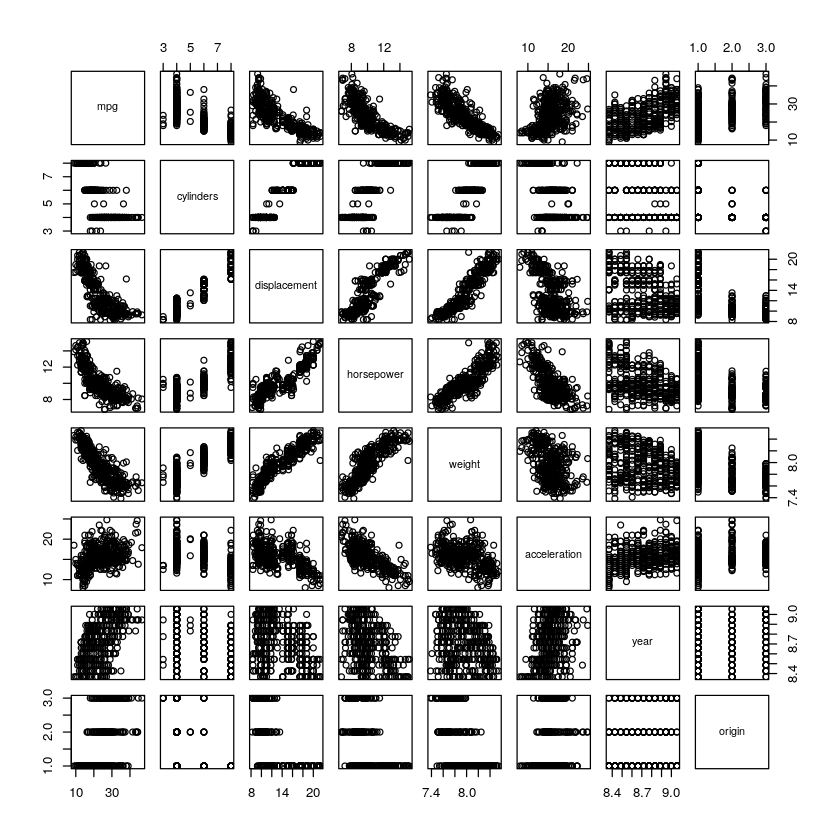

In [158]:
pairs(df.clean)

In [159]:
cor.df.clean <- round(cor(df.clean), 2)
cor.df.clean[upper.tri(cor.df.clean, diag = TRUE)] <- 0

cor.df.clean

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
cylinders,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0
displacement,-0.82,0.95,0.00,0.00,0.00,0.00,0.00,0
horsepower,-0.80,0.85,0.89,0.00,0.00,0.00,0.00,0
weight,-0.84,0.88,0.94,0.86,0.00,0.00,0.00,0
acceleration,0.42,-0.50,-0.52,-0.70,-0.40,0.00,0.00,0
year,0.58,-0.34,-0.35,-0.41,-0.29,0.29,0.00,0
origin,0.57,-0.57,-0.65,-0.47,-0.61,0.21,0.18,0


In [160]:
melt(cor.df.clean) %>% 
    mutate(abs.value=abs(value)) %>% 
    arrange(desc(abs.value)) %>% 
    select(X1,X2,abs.value) %>% 
    head(10)

X1,X2,abs.value
displacement,cylinders,0.95
weight,displacement,0.94
horsepower,displacement,0.89
weight,cylinders,0.88
weight,horsepower,0.86
horsepower,cylinders,0.85
weight,mpg,0.84
displacement,mpg,0.82
horsepower,mpg,0.80
cylinders,mpg,0.78


From the above table we can see that `displacement` is highly correlated with multiple variables like `cylinders`, `weight`, `horsepower`  
Collinearity could increase the Standard error, so we can remove `displacement`

In [161]:
df.clean <- within(df.clean, rm(displacement))

In [162]:
cor.df.clean <- round(cor(df.clean), 2)
cor.df.clean[upper.tri(cor.df.clean, diag = TRUE)] <- 0

melt(cor.df.clean) %>% 
    mutate(abs.value=abs(value)) %>% 
    arrange(desc(abs.value)) %>% 
    select(X1,X2,abs.value) %>% 
    head(10)

X1,X2,abs.value
weight,cylinders,0.88
weight,horsepower,0.86
horsepower,cylinders,0.85
weight,mpg,0.84
horsepower,mpg,0.80
cylinders,mpg,0.78
acceleration,horsepower,0.70
origin,weight,0.61
year,mpg,0.58
origin,mpg,0.57


## Linear Regression

In [163]:
lm.fit <- lm(mpg~., data=df.clean)

In [164]:
summary(lm.fit)


Call:
lm(formula = mpg ~ ., data = df.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4702 -1.8667 -0.0388  1.6388 12.9101 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   55.265787  12.017987   4.599 5.78e-06 ***
cylinders      0.260259   0.217432   1.197 0.232055    
horsepower    -0.437556   0.290233  -1.508 0.132476    
weight       -18.130843   1.729201 -10.485  < 2e-16 ***
acceleration  -0.006847   0.097845  -0.070 0.944246    
year          13.107065   0.838213  15.637  < 2e-16 ***
origin         0.860566   0.253494   3.395 0.000758 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.125 on 385 degrees of freedom
Multiple R-squared:  0.8422,	Adjusted R-squared:  0.8397 
F-statistic: 342.3 on 6 and 385 DF,  p-value: < 2.2e-16


**Model summary**
* F-statistic has p-value close to 0, which suggests that *atleast one variable has a non zero coefficient*.  
* The Residual Standard Error(RSE) is 3.123
* Adjusted R-squared value is 0.8397, which suggests that 83% of the variability in mpg can be explained by the model
* Individual t-test suggests that `cylinders`, `horsepower` and `acceleration` have less significance in the model

In [165]:
RSE <- 3.123
mpg.mean <- mean(mpg)

cat("Error rate of the model is ", round(RSE/mpg.mean, 2)*100, "%")

Error rate of the model is  13 %

Previous correlation matrix suggested that `cylinders` have high correlation with `weight`, so we can try adding interaction terms to check for synergy effects in the model

In [166]:
lm.fit2 <- lm(mpg~. + cylinders:weight, data = df.clean)

In [167]:
summary(lm.fit2)


Call:
lm(formula = mpg ~ . + cylinders:weight, data = df.clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7381  -1.7263  -0.2222   1.5666  12.5847 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      165.90861   23.42746   7.082 6.83e-12 ***
cylinders        -23.50372    4.37720  -5.370 1.37e-07 ***
horsepower        -0.76855    0.28658  -2.682  0.00764 ** 
weight           -31.55731    2.98091 -10.586  < 2e-16 ***
acceleration      -0.03770    0.09458  -0.399  0.69037    
year              13.33501    0.80986  16.466  < 2e-16 ***
origin             0.60658    0.24901   2.436  0.01531 *  
cylinders:weight   2.92166    0.53754   5.435 9.74e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.015 on 384 degrees of freedom
Multiple R-squared:  0.8534,	Adjusted R-squared:  0.8508 
F-statistic: 319.4 on 7 and 384 DF,  p-value: < 2.2e-16


We can see the Adjusted R-squared has improved from 0.8397 to 0.8508

Even with improved R-squared value, we can use ANOVA to determine if the variance in the new model is statistically significant.

In [168]:
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
385,3759.749,NA,NA,NA,NA
384,3491.162,1,268.5864,29.54236,9.743587e-08


With p-value closer to 0, we can conclude that our model has significantly improved by adding the interaction term.

In [169]:
cor(df.clean)[,"cylinders"]

mpg    cylinders   horsepower       weight acceleration         year 
  -0.7776175    1.0000000    0.8492664    0.8843031   -0.5046834   -0.3449596 
      origin 
  -0.5689316

`acceleration` seems to have high correlation with `weight`, so we can try adding them as interaction terms to the previous model

In [170]:
lm.fit3 <- lm(mpg~. + cylinders:weight + acceleration:weight, data = df.clean)

In [171]:
summary(lm.fit3)


Call:
lm(formula = mpg ~ . + cylinders:weight + acceleration:weight, 
    data = df.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6252 -1.6587 -0.1597  1.5598 12.2128 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.1499    51.3077   0.139 0.889244    
cylinders           -16.3204     4.7878  -3.409 0.000722 ***
horsepower           -0.9954     0.2900  -3.432 0.000665 ***
weight              -11.4660     6.5003  -1.764 0.078541 .  
acceleration          6.8970     2.0034   3.443 0.000639 ***
year                 13.6473     0.8036  16.984  < 2e-16 ***
origin                0.6162     0.2455   2.509 0.012505 *  
cylinders:weight      2.0106     0.5916   3.398 0.000749 ***
weight:acceleration  -0.8803     0.2540  -3.465 0.000590 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.973 on 383 degrees of freedom
Multiple R-squared:  0.8579,	Adjusted R-squared:  0.8549 
F-stat

In [174]:
RSE <- 2.973
mpg.mean <- mean(mpg)

cat("Error rate of the model is ", round(RSE/mpg.mean, 2)*100, "%")

Error rate of the model is  13 %

We can notice that the Adjusted R-squared value improved from 0.8508 to 0.8549

In [173]:
anova(lm.fit2, lm.fit3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
384,3491.162,NA,NA,NA,NA
383,3385.031,1,106.1309,12.0082,0.0005896368


Testing the previous two models for ANOVA resulted p-value : 0.0005896368 (which is <0.005)  
So we can conclude that the new model is signifcantly different from previous model and can explain 85.49% of variability in `mpg`

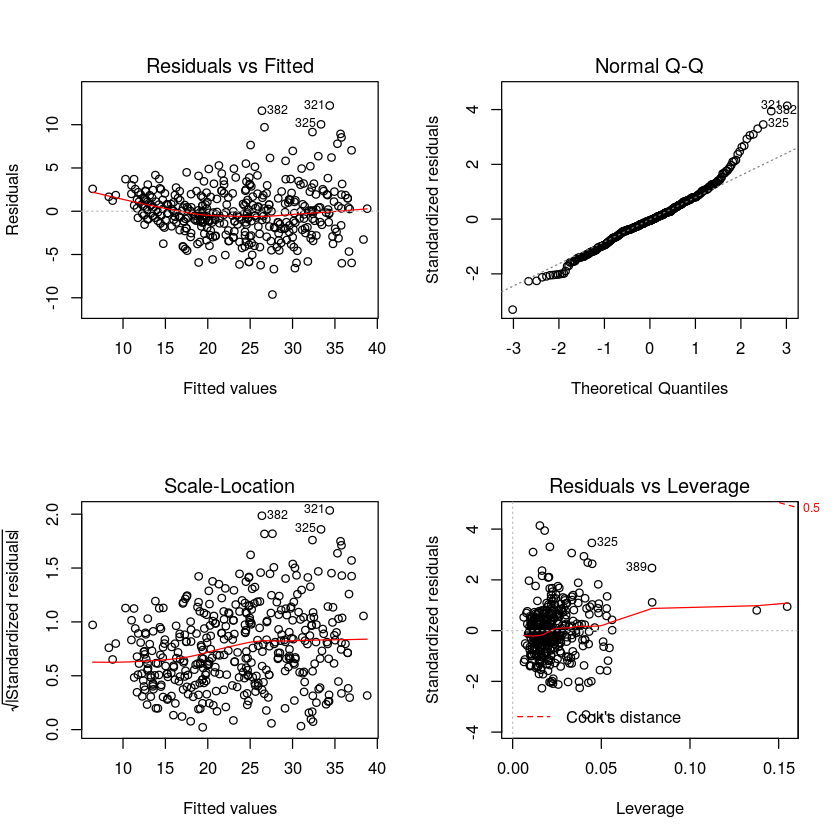

In [176]:
par(mfrow=c(2,2))
plot(lm.fit3)

We can try testing out different models for better prediction

## Summary
From the last model we can notice the following:
* With every new `year`, the automobile gets more fuel efficient (for about 13.6473 mpg)
* `cylinders` and `weight` negatively impacts fuel efficiency